In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    perform_experiments,
    Samplers,
    SequentialEvaluator,
)
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

In [2]:
# Initialize the model
dike_model, planning_steps = get_model_for_problem_formulation(6)
# Load the experiments and outcomes from MOEA and drop unnecessary columns
experiments = pd.read_csv('Results/Final_policies_experiments.csv')
outcomes = pd.read_csv('Results/Final_policies_outcomes.csv')
outcomes.drop(columns='Unnamed: 0', inplace=True)

In [3]:
# Join the outcomes and experiments, drop unnecessary columns and filter out the poilcy that should not be included
results = experiments.join(outcomes)
results.drop(columns='Unnamed: 0', inplace=True)
results = results[results['2_RfR 0'] == 0]

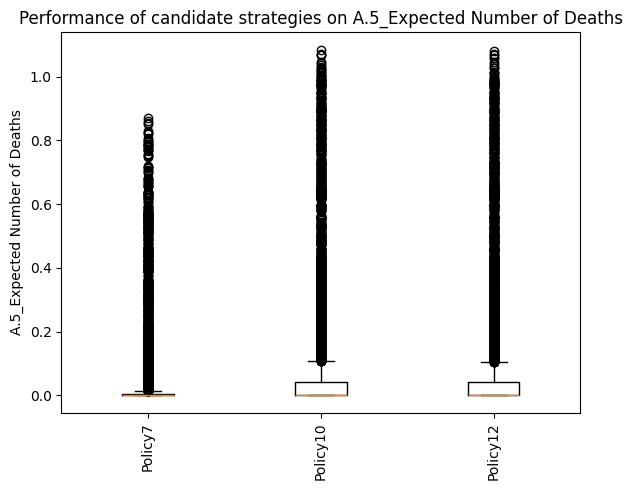

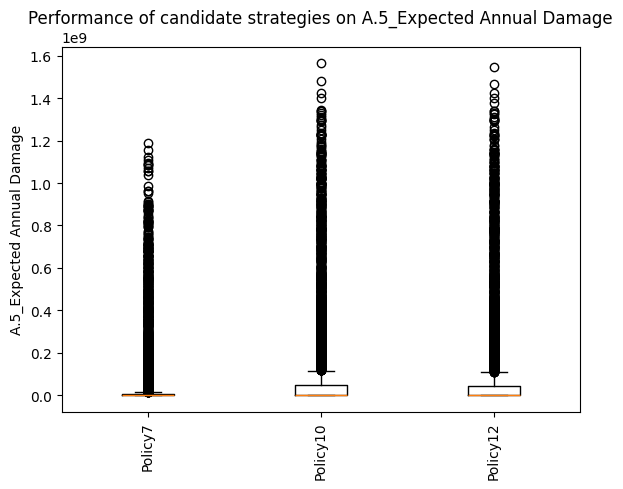

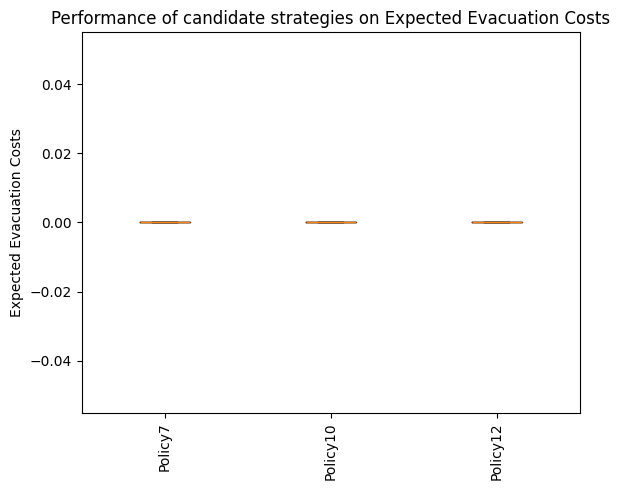

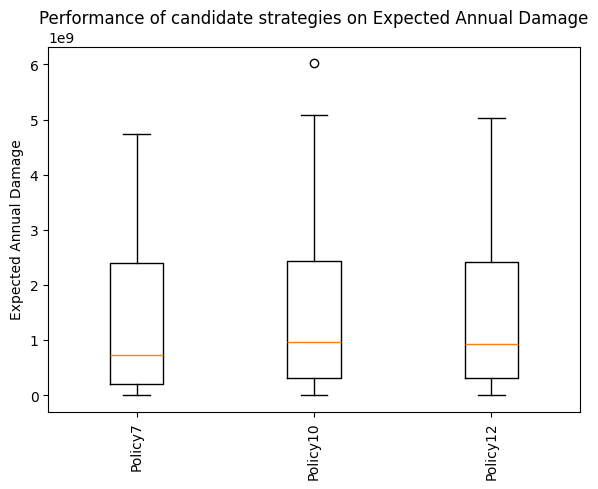

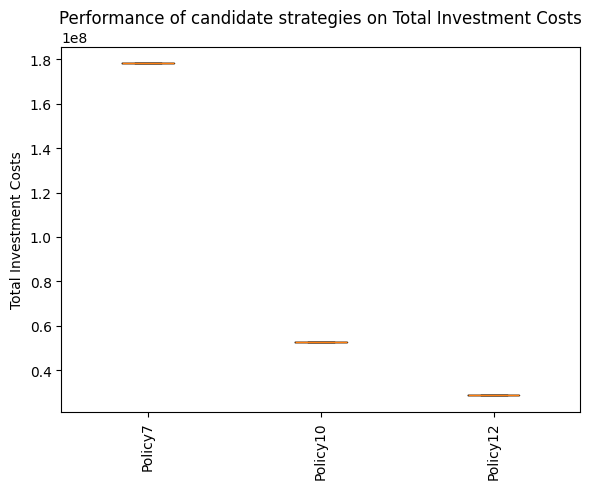

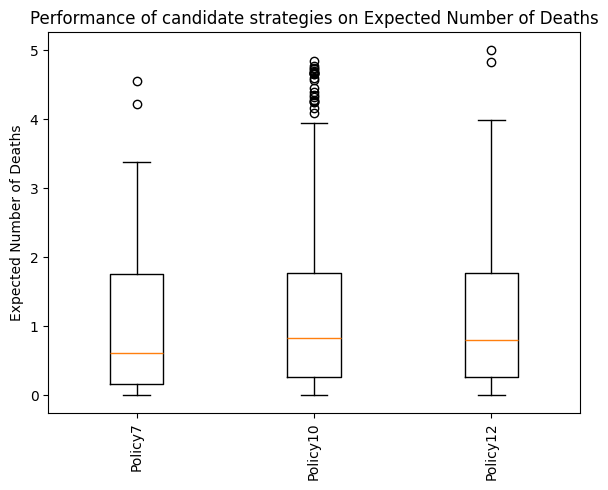

In [4]:
# Define a function to split the outcome dataframe into multiple dataframes for each candidate strategy
def split_dataframes(dataframe):
    dataframes = []
    # Manually determine the splitting indexes
    for i in range(6000, 18001, 6000):
        start = i - 6000
        end = i
        df = dataframe.iloc[start:end]
        dataframes.append(df)
    return dataframes

# Define a function to plot a boxplot for each policy
def Boxplots_policies(dataframes, x_labels):   
    # Loop over the objectives and retrieve the data for that objective
    # Plot a Boxplot
    for out in dike_model.outcomes:
        data = [df[out.name] for df in dataframes]
        plt.figure(figsize=(6, 5))
        plt.boxplot(data, labels=x_labels)
        plt.title(f'Performance of candidate strategies on {out.name}')
        plt.ylabel(out.name)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'Plots/Performance of candidate strategies on {out.name}.png')
        plt.show()

# Define a list of dataframes by calling the split_dataframes function
dataframes = split_dataframes(results)
# Define a list of labels
x_labels = results['policy'].unique()
# Create the boxplots
Boxplots_policies(dataframes, x_labels)

In [5]:
# Load the experiments and outcomes that is used for PRIM
experiments_prim = pd.read_csv('data/Results_Candidate_Solutions_experiments.csv')
outcomes_prim = pd.read_csv('data/Results_Candidate_Solutions_outcomes.csv')
experiments_prim.drop(columns='Unnamed: 0', inplace=True)

In [6]:
# Combine the experiments and outcomes and select only the wanted policies
results_prim = experiments_prim.join(outcomes_prim)
results_prim.drop(columns='Unnamed: 0', inplace=True)
results_prim = results[results_prim['2_RfR 0'] == 0]

C:\Users\simon\AppData\Local\Temp\ipykernel_14968\2070358432.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_prim = results[results_prim['2_RfR 0'] == 0]


In [7]:
# Manually test which policies should be renamed to get the corresponding label
policy_test = results_prim[['A.3_DikeIncrease 0', 'policy']].drop_duplicates()
results_prim.replace({'Policy0': 'Policy7', 'Policy6000': 'Policy10', 'Policy12000': 'Policy12'}, inplace=True)

In [8]:
# Load the PRIM boxes of the worst cases
box_all = pd.read_csv('data/All_space_Prim3.csv')
box_a5 = pd.read_csv('data/A5_space_Prim3.csv')

In [9]:
# Manually create a condition to select only the scenarios that are within one of the PRIM boxes
condition = (((results_prim['A.1_pfail'] > float(box_all.iloc[1, 1])) & (results_prim['A.1_pfail'] < float(box_all.iloc[1, 2])) & (str(results_prim['discount rate 2']) in box_all.iloc[2, 1][1:-1].split(','))) | ((results_prim['A.5_pfail'] > float(box_a5.iloc[1, 1])) & (results_prim['A.5_pfail'] < float(box_a5.iloc[1, 2])) & (results_prim['A.1_pfail'] > float(box_a5.iloc[2, 1])) & (results_prim['A.1_pfail'] < float(box_a5.iloc[2, 2])) & (results_prim['A.2_pfail'] > float(box_a5.iloc[3, 1])) & (results_prim['A.2_pfail'] < float(box_a5.iloc[3, 2])) & (results_prim['A.4_pfail'] > float(box_a5.iloc[4, 1])) & (results_prim['A.4_pfail'] < float(box_a5.iloc[4, 2]))))

In [10]:
# Select the worst cases
worst_cases = results_prim[condition]

In [11]:
# Select the worst cases for each policy separately
worst_case_pol7 = worst_cases[worst_cases['policy'] == 'Policy7']
worst_case_pol10 = worst_cases[worst_cases['policy'] == 'Policy10']
worst_case_pol12 = worst_cases[worst_cases['policy'] == 'Policy12']

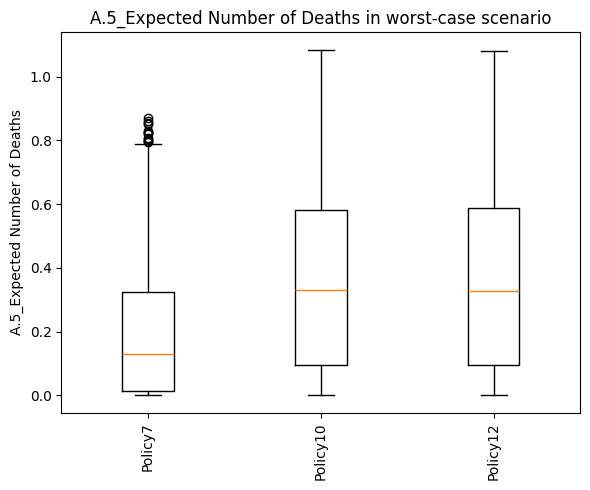

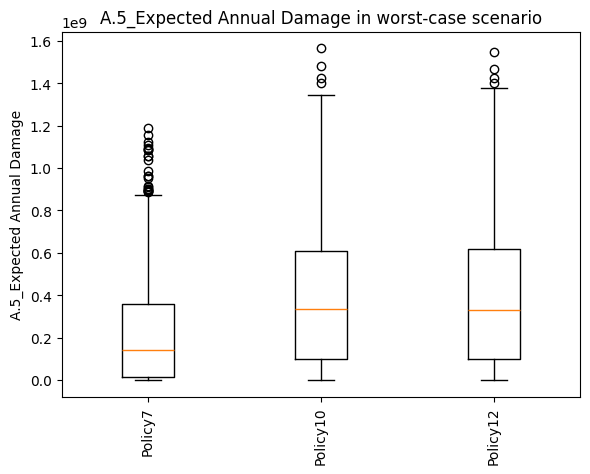

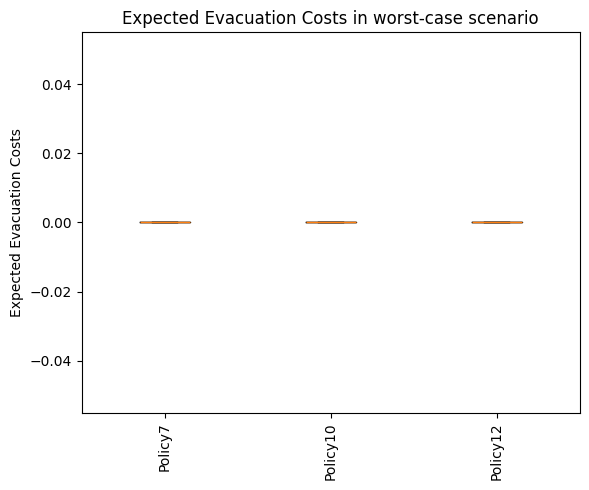

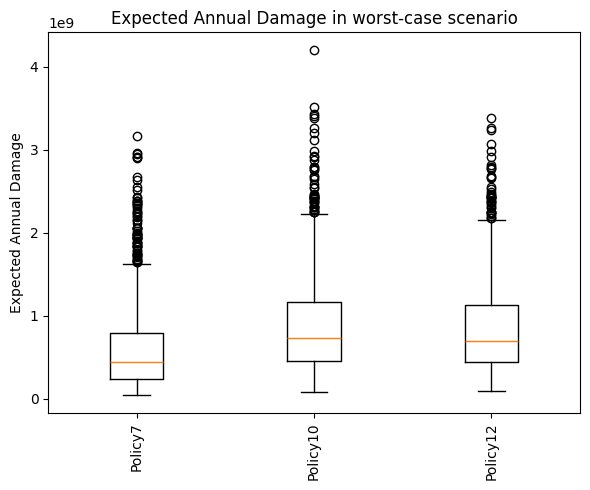

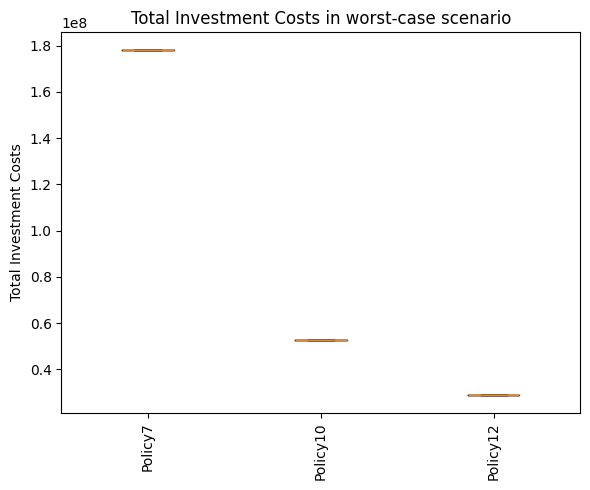

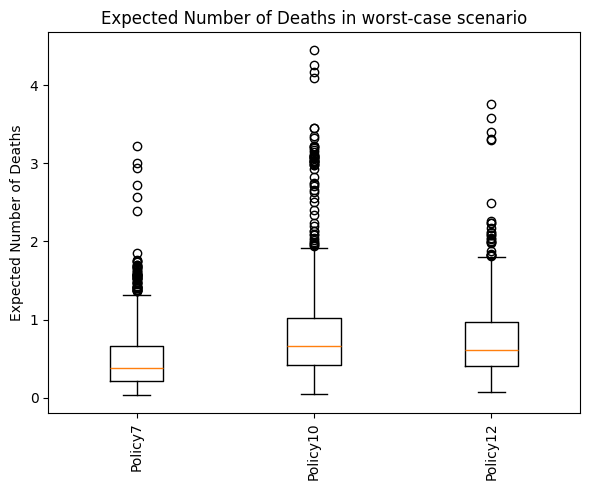

In [12]:
# Define a function to plot a boxplot for each outcome
def Boxplots_worstcases(dataframes, x_labels):   
    # Loop over the objectives and retrieve the data for that objective
    # Plot a Boxplot
    for out in dike_model.outcomes:
        data = [df[out.name] for df in dataframes]
        plt.figure(figsize=(6, 5))
        plt.boxplot(data, labels=x_labels)
        plt.title(f'{out.name} in worst-case scenario')
        plt.ylabel(out.name)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'Plots/{out.name} in worst-case scenario.png')
        plt.show()

# Create a list of dataframes 
dataframes = [worst_case_pol7, worst_case_pol10, worst_case_pol12]       
# Define a list of labels
x_labels = worst_cases['policy'].unique()

# Create the boxplots
Boxplots_worstcases(dataframes, x_labels)